## 1. Import and Install Dependencies

In [4]:
!pip install opencv-python mediapipe

In [2]:
!pip install tensorflow-gpu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\DELL\AppData\Local\Temp\pip-install-1royekik\tensorflow-gpu_1cedbbe673d0455981906aaf43ca9163\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR conversion BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make predictions
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR conversion RGB 2 BGR
    return image, results

In [61]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [101]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(150,150,150), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(150,150,150), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [8]:
mp_drawing.draw_landmarks??

In [102]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [15]:
    cap.release()
    cv2.destroyAllWindows()

In [21]:
print(len(results.face_landmarks.landmark))

468


In [22]:
frame

array([[[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [181, 175, 176],
        [181, 175, 176],
        [182, 176, 177]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [182, 175, 176],
        [181, 175, 176],
        [183, 177, 178]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [182, 175, 176],
        [183, 176, 177],
        [184, 177, 178]],

       ...,

       [[123, 131, 125],
        [122, 129, 124],
        [123, 129, 124],
        ...,
        [232, 225, 210],
        [232, 225, 210],
        [232, 225, 210]],

       [[123, 129, 124],
        [123, 129, 124],
        [123, 129, 124],
        ...,
        [232, 225, 210],
        [232, 225, 210],
        [232, 225, 210]],

       [[124, 129, 124],
        [124, 129, 124],
        [123, 129, 124],
        ...,
        [232, 225, 210],
        [232, 225, 210],
        [232, 225, 210]]

In [23]:
results

mediapipe.python.solution_base.SolutionOutputs

In [103]:
draw_styled_landmarks(frame, results)

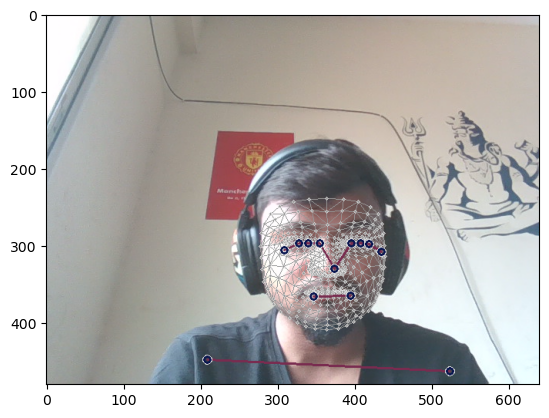

In [104]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## 3. Extract Keypoints Values

In [26]:
results.pose_landmarks

landmark {
  x: 0.6869494318962097
  y: 0.7219448685646057
  z: -1.4037892818450928
  visibility: 0.9990108013153076
}
landmark {
  x: 0.7078083753585815
  y: 0.6609859466552734
  z: -1.3302733898162842
  visibility: 0.9991741180419922
}
landmark {
  x: 0.7239125967025757
  y: 0.6605048775672913
  z: -1.3305327892303467
  visibility: 0.9992622137069702
}
landmark {
  x: 0.7385340929031372
  y: 0.6608749032020569
  z: -1.3304543495178223
  visibility: 0.9991602301597595
}
landmark {
  x: 0.6531392335891724
  y: 0.6616353988647461
  z: -1.3440160751342773
  visibility: 0.9989914298057556
}
landmark {
  x: 0.6301556825637817
  y: 0.6619228720664978
  z: -1.3439503908157349
  visibility: 0.9989138245582581
}
landmark {
  x: 0.6068434119224548
  y: 0.6634417772293091
  z: -1.3443597555160522
  visibility: 0.9987183213233948
}
landmark {
  x: 0.7460241317749023
  y: 0.6827393770217896
  z: -0.8348697423934937
  visibility: 0.9994835257530212
}
landmark {
  x: 0.5624434351921082
  y: 0.686077

In [27]:
len(results.right_hand_landmarks.landmark)

21

In [28]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [29]:
# Above code more compact
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [30]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [31]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)

In [32]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)

In [33]:
len(face)

1404

In [34]:
len(results.face_landmarks.landmark)

468

In [35]:
rh

array([ 7.72954881e-01,  9.59781647e-01, -3.67599796e-07,  7.80784607e-01,
        8.78029048e-01,  2.87166238e-03,  7.59282231e-01,  8.25363159e-01,
       -4.75089671e-03,  7.25810289e-01,  8.14947486e-01, -1.59645658e-02,
        6.92872047e-01,  8.25090706e-01, -2.79267579e-02,  7.62759328e-01,
        7.68704951e-01,  1.25626696e-03,  6.90436065e-01,  7.78739512e-01,
       -1.77447535e-02,  6.83845103e-01,  8.27960372e-01, -3.23954113e-02,
        6.96578324e-01,  8.66896510e-01, -3.99873964e-02,  7.39135146e-01,
        7.71631956e-01, -7.53021892e-03,  6.66351080e-01,  7.96853244e-01,
       -2.51625311e-02,  6.67574942e-01,  8.54009330e-01, -3.42518501e-02,
        6.85443819e-01,  8.93377483e-01, -3.77063937e-02,  7.12750673e-01,
        7.90775120e-01, -1.71364397e-02,  6.47117734e-01,  8.23005021e-01,
       -3.37203331e-02,  6.55287147e-01,  8.80653322e-01, -3.75760719e-02,
        6.77677095e-01,  9.17331040e-01, -3.73263173e-02,  6.87756538e-01,
        8.19263816e-01, -

In [36]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, lh, rh])

In [37]:
result_test = extract_keypoints(results)

In [38]:
468*3 + 33*4 + 21*3 + 21*3

1662

In [39]:
result_test

array([ 0.68694943,  0.72194487, -1.40378928, ...,  0.66395706,
        0.91894853, -0.04488542])

In [40]:
result_test.shape

(1662,)

In [41]:
np.save('0', result_test)

In [42]:
np.load('0.npy')

array([ 0.68694943,  0.72194487, -1.40378928, ...,  0.66395706,
        0.91894853, -0.04488542])

## 4. Setup Folders for Collection

In [179]:
#path for exported numpy array
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of data
no_sequences = 30

#videos are going to be 30 frames in length
sequence_length = 30

In [ ]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [180]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and testing

In [181]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # New loop
    # Loop through actions
    for action in actions:
        # Loop through sequence aka videos
        for sequence in range(no_sequences):
            # Loop through video Length aka sequence Length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                # print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait Logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

In [188]:
# incase of interrupt, close the webcam
cap.release()
cv2.destroyAllWindows()

## 6. Preprocess data and create lebels and Features

In [45]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [182]:
label_map = {label:num for num, label in enumerate(actions)}

In [183]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [184]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [185]:
np.array(sequences).shape

(90, 30, 1662)

In [186]:
np.array(labels).shape

(90,)

In [187]:
X = np.array(sequences)

In [188]:
X.shape

(90, 30, 1662)

In [189]:
y = to_categorical(labels).astype(int)

In [190]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [192]:
X_test.shape

(5, 30, 1662)

## 7. Build and Train LSTM Neural Network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [193]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [198]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [60]:
# result in this format due to softmax fn
res = [0.7, 0.2, 0.1]

In [61]:
actions[np.argmax(res)]

'hello'

In [199]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [196]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 75ms/step - loss: 4.2092 - categorical_accuracy: 0.4000
Epoch 2/2000
3/3 [==============================] - 0s 143ms/step - loss: 21.7490 - categorical_accuracy: 0.3059
Epoch 3/2000
3/3 [==============================] - 0s 132ms/step - loss: 9.6874 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 143ms/step - loss: 8.2629 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 145ms/step - loss: 11.9722 - categorical_accuracy: 0.2824
Epoch 6/2000
3/3 [==============================] - 0s 143ms/step - loss: 12.1339 - categorical_accuracy: 0.3412
Epoch 7/2000
3/3 [==============================] - 0s 151ms/step - loss: 18.8706 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 135ms/step - loss: 25.3314 - categorical_accuracy: 0.2471
Epoch 9/2000
3/3 [==============================] - 0s 102ms/step - loss: 13.9193 - categorical_accu

3/3 [==============================] - 0s 88ms/step - loss: 192.6916 - categorical_accuracy: 0.3882
Epoch 73/2000
3/3 [==============================] - 0s 132ms/step - loss: 79.5430 - categorical_accuracy: 0.4000
Epoch 74/2000
3/3 [==============================] - 0s 81ms/step - loss: 53.0721 - categorical_accuracy: 0.2941
Epoch 75/2000
3/3 [==============================] - 0s 121ms/step - loss: 35.0570 - categorical_accuracy: 0.3529
Epoch 76/2000
3/3 [==============================] - 0s 84ms/step - loss: 59.0737 - categorical_accuracy: 0.3882
Epoch 77/2000
3/3 [==============================] - 0s 129ms/step - loss: 60.0621 - categorical_accuracy: 0.3529
Epoch 78/2000
3/3 [==============================] - 0s 81ms/step - loss: 44.1890 - categorical_accuracy: 0.2824
Epoch 79/2000
3/3 [==============================] - 0s 142ms/step - loss: 39.1967 - categorical_accuracy: 0.3765
Epoch 80/2000
3/3 [==============================] - 0s 89ms/step - loss: 35.8213 - categorical_accuracy:

3/3 [==============================] - 0s 136ms/step - loss: 2.9818 - categorical_accuracy: 0.3059
Epoch 145/2000
3/3 [==============================] - 0s 141ms/step - loss: 3.1354 - categorical_accuracy: 0.4588
Epoch 146/2000
3/3 [==============================] - 0s 142ms/step - loss: 6.2381 - categorical_accuracy: 0.3765
Epoch 147/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.6103 - categorical_accuracy: 0.3529
Epoch 148/2000
3/3 [==============================] - 0s 142ms/step - loss: 3.0138 - categorical_accuracy: 0.4353
Epoch 149/2000
3/3 [==============================] - 0s 132ms/step - loss: 3.1238 - categorical_accuracy: 0.3765
Epoch 150/2000
3/3 [==============================] - 0s 85ms/step - loss: 3.3139 - categorical_accuracy: 0.3412
Epoch 151/2000
3/3 [==============================] - 0s 143ms/step - loss: 4.7150 - categorical_accuracy: 0.3529
Epoch 152/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.5945 - categorical_accurac

3/3 [==============================] - 0s 86ms/step - loss: 27.6951 - categorical_accuracy: 0.4000
Epoch 216/2000
3/3 [==============================] - 0s 133ms/step - loss: 14.2900 - categorical_accuracy: 0.2706
Epoch 217/2000
3/3 [==============================] - 0s 135ms/step - loss: 29.5224 - categorical_accuracy: 0.3412
Epoch 218/2000
3/3 [==============================] - 0s 137ms/step - loss: 30.4435 - categorical_accuracy: 0.3765
Epoch 219/2000
3/3 [==============================] - 0s 144ms/step - loss: 29.0812 - categorical_accuracy: 0.2824
Epoch 220/2000
3/3 [==============================] - 0s 143ms/step - loss: 28.3375 - categorical_accuracy: 0.3176
Epoch 221/2000
3/3 [==============================] - 0s 141ms/step - loss: 17.0397 - categorical_accuracy: 0.3294
Epoch 222/2000
3/3 [==============================] - 0s 140ms/step - loss: 17.8361 - categorical_accuracy: 0.3294
Epoch 223/2000
3/3 [==============================] - 0s 144ms/step - loss: 14.7599 - categorica

3/3 [==============================] - 0s 136ms/step - loss: 6.8857 - categorical_accuracy: 0.2941
Epoch 287/2000
3/3 [==============================] - 0s 141ms/step - loss: 12.2155 - categorical_accuracy: 0.3765
Epoch 288/2000
3/3 [==============================] - 0s 138ms/step - loss: 10.5277 - categorical_accuracy: 0.3176
Epoch 289/2000
3/3 [==============================] - 0s 141ms/step - loss: 11.9297 - categorical_accuracy: 0.3647
Epoch 290/2000
3/3 [==============================] - 0s 141ms/step - loss: 7.5458 - categorical_accuracy: 0.2706
Epoch 291/2000
3/3 [==============================] - 0s 143ms/step - loss: 5.6118 - categorical_accuracy: 0.3765
Epoch 292/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.1565 - categorical_accuracy: 0.4471
Epoch 293/2000
3/3 [==============================] - 0s 140ms/step - loss: 7.7262 - categorical_accuracy: 0.2588
Epoch 294/2000
3/3 [==============================] - 0s 141ms/step - loss: 9.9718 - categorical_accu

Epoch 358/2000
3/3 [==============================] - 0s 139ms/step - loss: 5.4055 - categorical_accuracy: 0.2941
Epoch 359/2000
3/3 [==============================] - 0s 143ms/step - loss: 6.0892 - categorical_accuracy: 0.3294
Epoch 360/2000
3/3 [==============================] - 0s 140ms/step - loss: 3.6436 - categorical_accuracy: 0.3176
Epoch 361/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.9627 - categorical_accuracy: 0.4118
Epoch 362/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.9449 - categorical_accuracy: 0.4000
Epoch 363/2000
3/3 [==============================] - 0s 144ms/step - loss: 2.7783 - categorical_accuracy: 0.4471
Epoch 364/2000
3/3 [==============================] - 0s 143ms/step - loss: 4.1991 - categorical_accuracy: 0.3176
Epoch 365/2000
3/3 [==============================] - 0s 139ms/step - loss: 5.5906 - categorical_accuracy: 0.4588
Epoch 366/2000
3/3 [==============================] - 0s 130ms/step - loss: 3.2932 - cat

Epoch 430/2000
3/3 [==============================] - 0s 143ms/step - loss: 3.5186 - categorical_accuracy: 0.3529
Epoch 431/2000
3/3 [==============================] - 0s 140ms/step - loss: 4.3076 - categorical_accuracy: 0.4118
Epoch 432/2000
3/3 [==============================] - 0s 140ms/step - loss: 2.3894 - categorical_accuracy: 0.4353
Epoch 433/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.3253 - categorical_accuracy: 0.4471
Epoch 434/2000
3/3 [==============================] - 0s 83ms/step - loss: 3.4000 - categorical_accuracy: 0.3882
Epoch 435/2000
3/3 [==============================] - 0s 80ms/step - loss: 4.8250 - categorical_accuracy: 0.3765
Epoch 436/2000
3/3 [==============================] - 0s 113ms/step - loss: 4.8052 - categorical_accuracy: 0.3176
Epoch 437/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.5039 - categorical_accuracy: 0.4000
Epoch 438/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.4884 - categor

3/3 [==============================] - 0s 147ms/step - loss: 2.9931 - categorical_accuracy: 0.3059
Epoch 503/2000
3/3 [==============================] - 0s 144ms/step - loss: 2.1325 - categorical_accuracy: 0.3882
Epoch 504/2000
3/3 [==============================] - 0s 144ms/step - loss: 2.2760 - categorical_accuracy: 0.4588
Epoch 505/2000
3/3 [==============================] - 0s 141ms/step - loss: 3.7187 - categorical_accuracy: 0.3765
Epoch 506/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.9134 - categorical_accuracy: 0.4353
Epoch 507/2000
3/3 [==============================] - 0s 142ms/step - loss: 5.6034 - categorical_accuracy: 0.4000
Epoch 508/2000
3/3 [==============================] - 0s 142ms/step - loss: 4.4327 - categorical_accuracy: 0.3882
Epoch 509/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.9311 - categorical_accuracy: 0.4235
Epoch 510/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.7331 - categorical_accura

3/3 [==============================] - 0s 89ms/step - loss: 2.8733 - categorical_accuracy: 0.5412
Epoch 575/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.3997 - categorical_accuracy: 0.3882
Epoch 576/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.7398 - categorical_accuracy: 0.5059
Epoch 577/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.9078 - categorical_accuracy: 0.4118
Epoch 578/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.8342 - categorical_accuracy: 0.4353
Epoch 579/2000
3/3 [==============================] - 0s 140ms/step - loss: 2.9561 - categorical_accuracy: 0.4000
Epoch 580/2000
3/3 [==============================] - 0s 144ms/step - loss: 3.8004 - categorical_accuracy: 0.3765
Epoch 581/2000
3/3 [==============================] - 0s 143ms/step - loss: 3.3179 - categorical_accuracy: 0.3412
Epoch 582/2000
3/3 [==============================] - 0s 144ms/step - loss: 4.0326 - categorical_accurac

3/3 [==============================] - 0s 144ms/step - loss: 2.7271 - categorical_accuracy: 0.3647
Epoch 647/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.2251 - categorical_accuracy: 0.4353
Epoch 648/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.4919 - categorical_accuracy: 0.3176
Epoch 649/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.5927 - categorical_accuracy: 0.3765
Epoch 650/2000
3/3 [==============================] - 0s 146ms/step - loss: 2.7121 - categorical_accuracy: 0.3647
Epoch 651/2000
3/3 [==============================] - 0s 144ms/step - loss: 2.0953 - categorical_accuracy: 0.3647
Epoch 652/2000
3/3 [==============================] - 0s 91ms/step - loss: 2.3416 - categorical_accuracy: 0.4471
Epoch 653/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.6020 - categorical_accuracy: 0.3882
Epoch 654/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.8967 - categorical_accurac

3/3 [==============================] - 0s 145ms/step - loss: 1.1637 - categorical_accuracy: 0.5765
Epoch 719/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.4320 - categorical_accuracy: 0.4235
Epoch 720/2000
3/3 [==============================] - 0s 138ms/step - loss: 2.7829 - categorical_accuracy: 0.3882
Epoch 721/2000
3/3 [==============================] - 0s 145ms/step - loss: 4.5037 - categorical_accuracy: 0.5412
Epoch 722/2000
3/3 [==============================] - 0s 147ms/step - loss: 2.7783 - categorical_accuracy: 0.3412
Epoch 723/2000
3/3 [==============================] - 0s 141ms/step - loss: 3.6287 - categorical_accuracy: 0.2824
Epoch 724/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.6201 - categorical_accuracy: 0.5059
Epoch 725/2000
3/3 [==============================] - 0s 147ms/step - loss: 2.3311 - categorical_accuracy: 0.4353
Epoch 726/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.5895 - categorical_accura

3/3 [==============================] - 0s 122ms/step - loss: 1.6645 - categorical_accuracy: 0.5059
Epoch 791/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.1041 - categorical_accuracy: 0.4235
Epoch 792/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.3885 - categorical_accuracy: 0.5059
Epoch 793/2000
3/3 [==============================] - 0s 119ms/step - loss: 2.3524 - categorical_accuracy: 0.4000
Epoch 794/2000
3/3 [==============================] - 0s 133ms/step - loss: 3.3102 - categorical_accuracy: 0.3412
Epoch 795/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.7602 - categorical_accuracy: 0.5529
Epoch 796/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.0617 - categorical_accuracy: 0.4706
Epoch 797/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.9862 - categorical_accuracy: 0.4471
Epoch 798/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.6257 - categorical_accuracy:

3/3 [==============================] - 0s 120ms/step - loss: 1.4091 - categorical_accuracy: 0.5059
Epoch 863/2000
3/3 [==============================] - 0s 144ms/step - loss: 2.5071 - categorical_accuracy: 0.3882
Epoch 864/2000
3/3 [==============================] - 0s 145ms/step - loss: 2.5155 - categorical_accuracy: 0.4824
Epoch 865/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.2009 - categorical_accuracy: 0.4118
Epoch 866/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.4155 - categorical_accuracy: 0.4588
Epoch 867/2000
3/3 [==============================] - 0s 139ms/step - loss: 2.0197 - categorical_accuracy: 0.4118
Epoch 868/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.6857 - categorical_accuracy: 0.4000
Epoch 869/2000
3/3 [==============================] - 0s 136ms/step - loss: 5.9917 - categorical_accuracy: 0.5294
Epoch 870/2000
3/3 [==============================] - 0s 141ms/step - loss: 3.9976 - categorical_accura

3/3 [==============================] - 0s 143ms/step - loss: 1.6135 - categorical_accuracy: 0.5529
Epoch 935/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.6084 - categorical_accuracy: 0.4118
Epoch 936/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.6915 - categorical_accuracy: 0.5765
Epoch 937/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.6891 - categorical_accuracy: 0.5765
Epoch 938/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.8738 - categorical_accuracy: 0.5765
Epoch 939/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.6121 - categorical_accuracy: 0.6000
Epoch 940/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.3157 - categorical_accuracy: 0.5059
Epoch 941/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.3512 - categorical_accuracy: 0.5882
Epoch 942/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.5008 - categorical_accura

Epoch 1006/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.3920 - categorical_accuracy: 0.4941
Epoch 1007/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.7840 - categorical_accuracy: 0.4000
Epoch 1008/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.9411 - categorical_accuracy: 0.4118
Epoch 1009/2000
3/3 [==============================] - 0s 103ms/step - loss: 3.1080 - categorical_accuracy: 0.4118
Epoch 1010/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.9013 - categorical_accuracy: 0.4588
Epoch 1011/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.1644 - categorical_accuracy: 0.6235
Epoch 1012/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.3180 - categorical_accuracy: 0.6118
Epoch 1013/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.0837 - categorical_accuracy: 0.5882
Epoch 1014/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.2

3/3 [==============================] - 0s 143ms/step - loss: 2.0790 - categorical_accuracy: 0.3294
Epoch 1078/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.6928 - categorical_accuracy: 0.3059
Epoch 1079/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.3769 - categorical_accuracy: 0.3765
Epoch 1080/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.8737 - categorical_accuracy: 0.5412
Epoch 1081/2000
3/3 [==============================] - 0s 143ms/step - loss: 4.3766 - categorical_accuracy: 0.3059
Epoch 1082/2000
3/3 [==============================] - 0s 145ms/step - loss: 3.3983 - categorical_accuracy: 0.3412
Epoch 1083/2000
3/3 [==============================] - 0s 142ms/step - loss: 3.0914 - categorical_accuracy: 0.4000
Epoch 1084/2000
3/3 [==============================] - 0s 144ms/step - loss: 3.1589 - categorical_accuracy: 0.4353
Epoch 1085/2000
3/3 [==============================] - 0s 145ms/step - loss: 4.0484 - categorica

3/3 [==============================] - 0s 140ms/step - loss: 3.0486 - categorical_accuracy: 0.3647
Epoch 1149/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.5206 - categorical_accuracy: 0.3882
Epoch 1150/2000
3/3 [==============================] - 0s 98ms/step - loss: 3.5275 - categorical_accuracy: 0.3412
Epoch 1151/2000
3/3 [==============================] - 0s 143ms/step - loss: 4.0813 - categorical_accuracy: 0.3059
Epoch 1152/2000
3/3 [==============================] - 0s 145ms/step - loss: 3.6441 - categorical_accuracy: 0.3059
Epoch 1153/2000
3/3 [==============================] - 0s 142ms/step - loss: 5.1994 - categorical_accuracy: 0.3412
Epoch 1154/2000
3/3 [==============================] - 0s 144ms/step - loss: 5.9633 - categorical_accuracy: 0.3412
Epoch 1155/2000
3/3 [==============================] - 0s 141ms/step - loss: 4.6297 - categorical_accuracy: 0.3412
Epoch 1156/2000
3/3 [==============================] - 0s 143ms/step - loss: 7.7631 - categorical_

3/3 [==============================] - 0s 141ms/step - loss: 1.0748 - categorical_accuracy: 0.4118
Epoch 1220/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.7746 - categorical_accuracy: 0.3176
Epoch 1221/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.7203 - categorical_accuracy: 0.3529
Epoch 1222/2000
3/3 [==============================] - 0s 138ms/step - loss: 2.2370 - categorical_accuracy: 0.3176
Epoch 1223/2000
3/3 [==============================] - 0s 145ms/step - loss: 2.1910 - categorical_accuracy: 0.3647
Epoch 1224/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.9082 - categorical_accuracy: 0.4000
Epoch 1225/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.9200 - categorical_accuracy: 0.2706
Epoch 1226/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.9938 - categorical_accuracy: 0.2941
Epoch 1227/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.9360 - categorical

3/3 [==============================] - 0s 142ms/step - loss: 2.6936 - categorical_accuracy: 0.2706
Epoch 1291/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.8355 - categorical_accuracy: 0.4118
Epoch 1292/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.3760 - categorical_accuracy: 0.3294
Epoch 1293/2000
3/3 [==============================] - 0s 145ms/step - loss: 2.9222 - categorical_accuracy: 0.3294
Epoch 1294/2000
3/3 [==============================] - 0s 144ms/step - loss: 5.0906 - categorical_accuracy: 0.4118
Epoch 1295/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.7475 - categorical_accuracy: 0.3529
Epoch 1296/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.5190 - categorical_accuracy: 0.3647
Epoch 1297/2000
3/3 [==============================] - 0s 137ms/step - loss: 2.4953 - categorical_accuracy: 0.3647
Epoch 1298/2000
3/3 [==============================] - 0s 141ms/step - loss: 3.0506 - categorical

3/3 [==============================] - 0s 91ms/step - loss: 1.2207 - categorical_accuracy: 0.4471
Epoch 1362/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.4472 - categorical_accuracy: 0.4118
Epoch 1363/2000
3/3 [==============================] - 0s 111ms/step - loss: 2.5059 - categorical_accuracy: 0.2235
Epoch 1364/2000
3/3 [==============================] - 0s 133ms/step - loss: 2.0202 - categorical_accuracy: 0.3412
Epoch 1365/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.8115 - categorical_accuracy: 0.5294
Epoch 1366/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.4159 - categorical_accuracy: 0.2824
Epoch 1367/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.9774 - categorical_accuracy: 0.3176
Epoch 1368/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.6834 - categorical_accuracy: 0.3647
Epoch 1369/2000
3/3 [==============================] - 0s 146ms/step - loss: 2.2480 - categorical_a

3/3 [==============================] - 0s 143ms/step - loss: 1.4859 - categorical_accuracy: 0.3294
Epoch 1433/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.3595 - categorical_accuracy: 0.4000
Epoch 1434/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.3262 - categorical_accuracy: 0.4941
Epoch 1435/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.4945 - categorical_accuracy: 0.4824
Epoch 1436/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.5041 - categorical_accuracy: 0.4000
Epoch 1437/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.7689 - categorical_accuracy: 0.4941
Epoch 1438/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.1674 - categorical_accuracy: 0.2941
Epoch 1439/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.4327 - categorical_accuracy: 0.4588
Epoch 1440/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.2808 - categorica

3/3 [==============================] - 0s 96ms/step - loss: 1.0945 - categorical_accuracy: 0.4471
Epoch 1504/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.2639 - categorical_accuracy: 0.4588
Epoch 1505/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.3309 - categorical_accuracy: 0.3882
Epoch 1506/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.6657 - categorical_accuracy: 0.4000
Epoch 1507/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.8369 - categorical_accuracy: 0.3412
Epoch 1508/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.8683 - categorical_accuracy: 0.5059
Epoch 1509/2000
3/3 [==============================] - 0s 91ms/step - loss: 2.1978 - categorical_accuracy: 0.3765
Epoch 1510/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.5787 - categorical_accuracy: 0.3882
Epoch 1511/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.5276 - categorical_accu

3/3 [==============================] - 0s 138ms/step - loss: 1.5578 - categorical_accuracy: 0.3765
Epoch 1575/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.3879 - categorical_accuracy: 0.3412
Epoch 1576/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.1645 - categorical_accuracy: 0.4706
Epoch 1577/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.1912 - categorical_accuracy: 0.5647
Epoch 1578/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.0134 - categorical_accuracy: 0.4588
Epoch 1579/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.1823 - categorical_accuracy: 0.3529
Epoch 1580/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1187 - categorical_accuracy: 0.5059
Epoch 1581/2000
3/3 [==============================] - 0s 143ms/step - loss: 0.9941 - categorical_accuracy: 0.5294
Epoch 1582/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.0151 - categorica

3/3 [==============================] - 0s 87ms/step - loss: 1.0761 - categorical_accuracy: 0.4588
Epoch 1646/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.0045 - categorical_accuracy: 0.5412
Epoch 1647/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.4754 - categorical_accuracy: 0.3294
Epoch 1648/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.5584 - categorical_accuracy: 0.2706
Epoch 1649/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.1269 - categorical_accuracy: 0.3294
Epoch 1650/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.5497 - categorical_accuracy: 0.4235
Epoch 1651/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.7851 - categorical_accuracy: 0.3176
Epoch 1652/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.5792 - categorical_accuracy: 0.4000
Epoch 1653/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.7572 - categorical

3/3 [==============================] - 0s 140ms/step - loss: 6.7099 - categorical_accuracy: 0.3059
Epoch 1717/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.9241 - categorical_accuracy: 0.3882
Epoch 1718/2000
3/3 [==============================] - 0s 142ms/step - loss: 3.1621 - categorical_accuracy: 0.3176
Epoch 1719/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.2517 - categorical_accuracy: 0.2941
Epoch 1720/2000
3/3 [==============================] - 0s 144ms/step - loss: 2.4109 - categorical_accuracy: 0.2706
Epoch 1721/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.9136 - categorical_accuracy: 0.3647
Epoch 1722/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.7793 - categorical_accuracy: 0.2706
Epoch 1723/2000
3/3 [==============================] - 0s 137ms/step - loss: 2.2101 - categorical_accuracy: 0.2706
Epoch 1724/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.5548 - categorica

3/3 [==============================] - 0s 140ms/step - loss: 2.8651 - categorical_accuracy: 0.3059
Epoch 1788/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.6560 - categorical_accuracy: 0.3412
Epoch 1789/2000
3/3 [==============================] - 0s 142ms/step - loss: 2.2823 - categorical_accuracy: 0.3529
Epoch 1790/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.6382 - categorical_accuracy: 0.3529
Epoch 1791/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.1449 - categorical_accuracy: 0.3412
Epoch 1792/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.6054 - categorical_accuracy: 0.4353
Epoch 1793/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.6736 - categorical_accuracy: 0.3647
Epoch 1794/2000
3/3 [==============================] - 0s 140ms/step - loss: 1.5300 - categorical_accuracy: 0.3412
Epoch 1795/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.4707 - categorical

3/3 [==============================] - 0s 143ms/step - loss: 1.3351 - categorical_accuracy: 0.3647
Epoch 1859/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.6533 - categorical_accuracy: 0.2471
Epoch 1860/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.1497 - categorical_accuracy: 0.2706
Epoch 1861/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.2647 - categorical_accuracy: 0.4118
Epoch 1862/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.4443 - categorical_accuracy: 0.3294
Epoch 1863/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.8397 - categorical_accuracy: 0.3412
Epoch 1864/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.5704 - categorical_accuracy: 0.2941
Epoch 1865/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.1201 - categorical_accuracy: 0.4706
Epoch 1866/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.3298 - categorica

3/3 [==============================] - 0s 144ms/step - loss: 1.2509 - categorical_accuracy: 0.3294
Epoch 1930/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.3198 - categorical_accuracy: 0.3176
Epoch 1931/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.4351 - categorical_accuracy: 0.3176
Epoch 1932/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2458 - categorical_accuracy: 0.3647
Epoch 1933/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0947 - categorical_accuracy: 0.4118
Epoch 1934/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.4293 - categorical_accuracy: 0.2824
Epoch 1935/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.4856 - categorical_accuracy: 0.3294
Epoch 1936/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.3873 - categorical_accuracy: 0.3412
Epoch 1937/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.1920 - categorical_a

3/3 [==============================] - 0s 93ms/step - loss: 1.2975 - categorical_accuracy: 0.3647


In [137]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

## 8.Make Predictions

In [138]:
res = model.predict(X_test)

1/1 [==============================] - 0s 471ms/step


In [147]:
actions[np.argmax(res[0])]

'thanks'

In [148]:
actions[np.argmax(y_test[0])]

'thanks'

## 9.Save Weights

In [149]:
model.save('action.h5')

D:\Anaconda_py\Python_ML\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [197]:
#incase of deletion of model, we can reload
del model

In [200]:
model.load_weights('action.h5')

## 10. Evaluation using Confusion Matrix and Accuracy

In [86]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [201]:
yhat = model.predict(X_train)

3/3 [==============================] - 1s 26ms/step


In [202]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [203]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[47, 11],
        [17, 10]],

       [[38, 18],
        [ 1, 28]],

       [[43, 13],
        [24,  5]]], dtype=int64)

In [204]:
accuracy_score(ytrue, yhat)

0.5058823529411764

In [205]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [206]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [207]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 1],
        [2, 1]],

       [[2, 2],
        [0, 1]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [208]:
accuracy_score(ytrue, yhat)

0.4

## 11. Test in Real Time

In [110]:
from scipy import stats

In [209]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

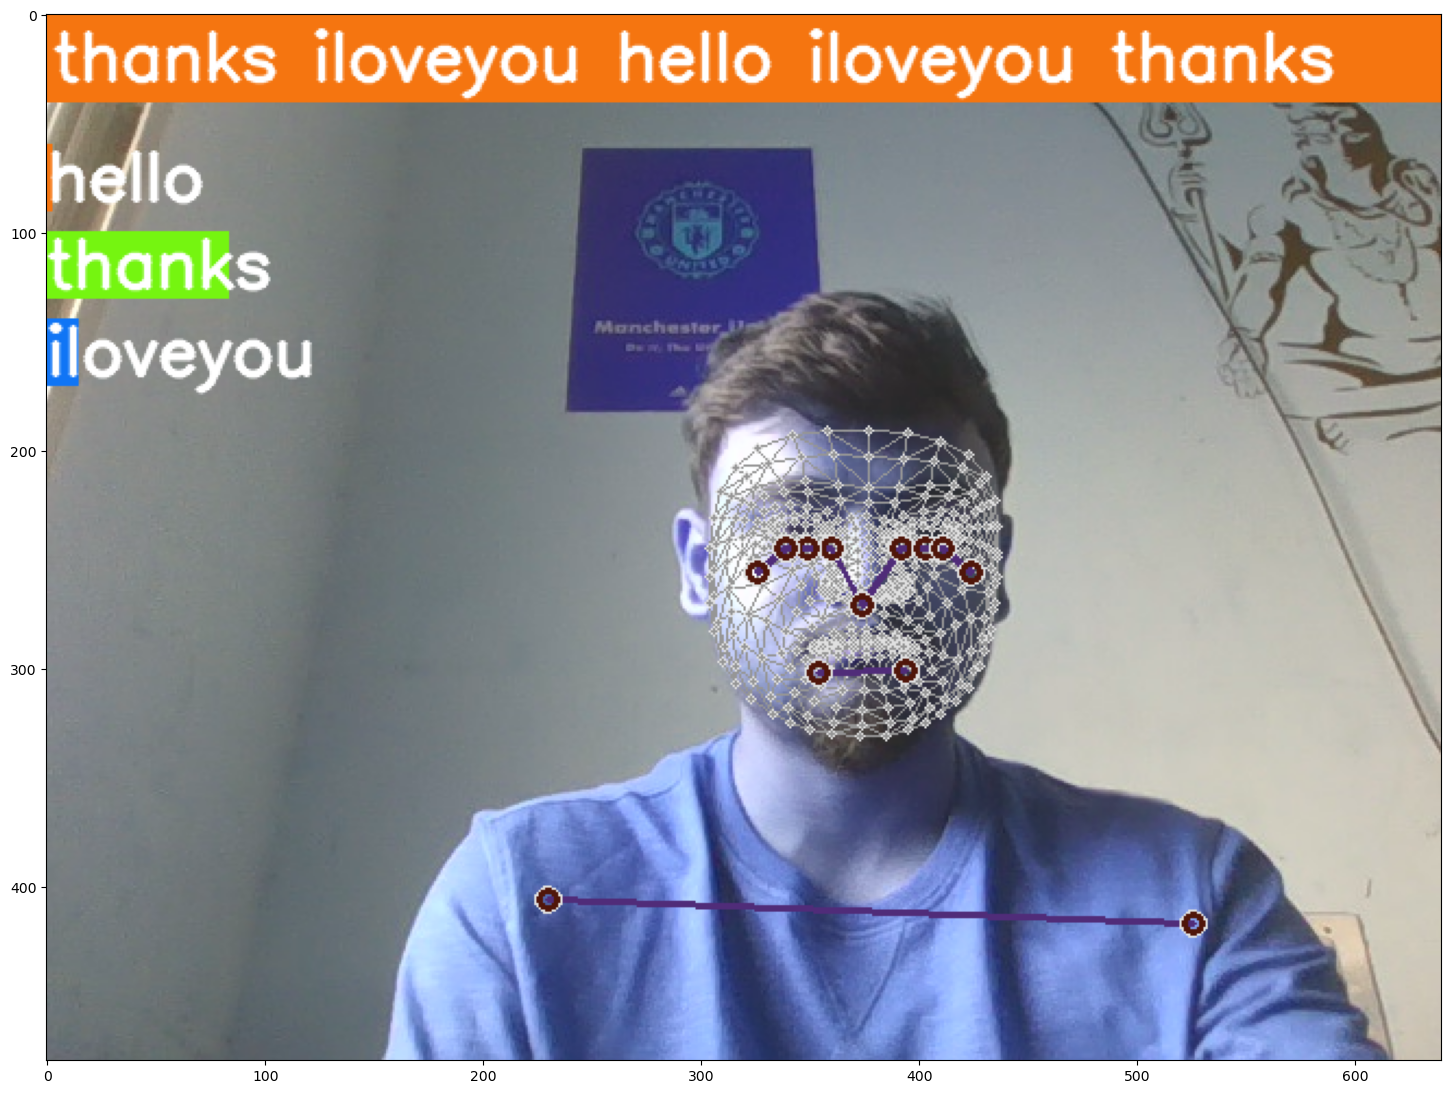

In [217]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [216]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.6

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 35ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
than

1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.pyth

1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 35ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 29ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'media

In [ ]:
cap.release()
cv2.destroyAllWindows()